In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score as score


diamonds = pd.read_csv('diamonds.csv')  # read the data


diamonds['cut'] = diamonds['cut'].astype('category')  # map the cut feature
diamonds['color'] = diamonds['color'].astype('category') # map the color feature
diamonds['clarity'] = diamonds['clarity'].astype('category') # map the clarity feature

diamonds['cut'] = diamonds['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
diamonds['color'] = diamonds['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})
diamonds['clarity'] = diamonds['clarity'].map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})


X = diamonds[['carat','price','cut','color','clarity']]  # select the features
model = KMeans(n_clusters=5, random_state=0).fit(X)  # create the model

print(model.labels_)  # print the labels

print(model.cluster_centers_)  # print the centers




c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 2 ... 4 4 4]
[[1.18024823e+00 6.54813271e+03 2.81264734e+00 3.01775066e+00
  2.68950215e+00]
 [1.90781709e+00 1.57466842e+04 2.86262702e+00 2.71095220e+00
  2.64207753e+00]
 [4.31775300e-01 1.13896603e+03 3.03583611e+00 3.65583391e+00
  3.48039467e+00]
 [1.49259756e+00 1.05727337e+04 2.93441467e+00 2.94287729e+00
  3.17230842e+00]
 [9.03228196e-01 3.74748323e+03 2.66905615e+00 3.38964556e+00
  2.37172441e+00]]


In [76]:
# Add a new column 'cluster_label' to the DataFrame to store the cluster assignments
diamonds['cluster_label'] = model.labels_

# Now, you can save the DataFrame with cluster assignments to a new CSV file
diamonds.to_csv('diamonds_with_clusters.csv', index=False)

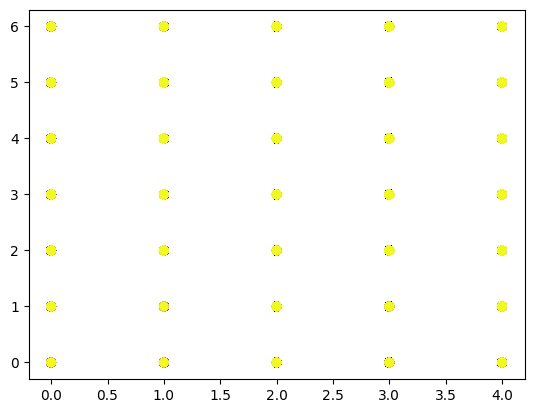

In [82]:
# Plot the data points and cluster centers
plt.scatter(X['cut'], X['color'], c=model.labels_, cmap='plasma')